## Models builder
The two examples before are both simple 1d-chain. Here we begin to build models for more realistic systems, in the minimulti package, we have some pre-defined builder so that we can build the models easily. One example is our favorate structure: the perovskite ABO3 structure with transition metal on the B site. With this builder, we can build cubic systems with either eg or t2g orbitals in the model.
Here is the example to how to use it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import write
from minimulti.electron.builder.perovskite import perovskite_builder


def build_single_perovskite(orbs='eg', nel=1):
    model = perovskite_builder(
        A='La',
        B='Mn',
        O='O',
        orbs=orbs,
        Hubbard_dict={'Mn': {
            'U': 0,
            'J': 0
        }},
    )
    model.set(
        nel=nel, tol_energy=1e-6, tol_rho=1e-6, mixing=0.8, sigma=0.1)
    model.set_kmesh([6, 6, 6])
    model.scf_solve(print_iter_info=False)
    pdos=model.get_pdos(emin=-10, emax=10, nedos=100, sigma=0.2, fname='dos.txt')
    #print("Charges of each orbital: ", model.get_charges())
    ax = model.plot_band(npoints=100)
    #ax = model.plot_unfolded_band(sc_matrix)
    plt.show()

For example, we can build an $e_g$ model with one electron per cell like below. By changing orbs='eg' to 't2g', we can build 't2g' models with 3 $t2g$ orbitals on each B site. These models are widely used in manganites and nickelates.

In [2]:
from ipywidgets import FloatSlider, interact, interact_manual, fixed
#build_single_perovskite(orbs='eg', nel=1)
interact(build_single_perovskite, orbs=['eg', 't2g'], nel=fixed(1));

interactive(children=(Dropdown(description='orbs', options=('eg', 't2g'), value='eg'), Output()), _dom_classes…

## Supercell and band unfolding
We often need to build the model for a supercell, e.g. when different magnetic orders need to be considered. The make_supercell method can be used for this purpose. As shown in the 1d-chain cell doubling example, the band is folded. Here we show how to unfold the band into the original BZ. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import write
from minimulti.electron.builder.perovskite import perovskite_builder


def build_perovskite_supercell_and_unfold(orbs='eg'):
    model = perovskite_builder(
        A='La',
        B='Mn',
        O='O',
        orbs=orbs,
        Hubbard_dict={'Mn': {
            'U': 0,
            'J': 0
        }},
    )
    sc_matrix = [[1, -1, 0], [1, 1, 0], [0, 0, 2]]  # G-type
    nsc = int(np.linalg.det(sc_matrix))
    model = model.make_supercell(sc_matrix)
    #write('LaMnO3.cif', model.atoms, vasp5=True , sort=True)
    #model.set_initial_spin([1, 1]*nsc)
    # FM
    spin = [1, 1, 1, 1]
    # A-AFM
    #spin=[1,-1,1,-1]
    #G-AFM
    #spin=[1,-1,-1,1]
    # C-AFM
    #spin=[1,1,-1,-1]
    #print(np.outer(spin, [-1, 1, -1, 1]).flatten())
    #model.set_onsite(
    #    np.outer(spin, [-1, 1, -1, 1]).flatten() * delta, mode='reset')
    model.set(
        nel=1 * nsc, tol_energy=1e-6, tol_rho=1e-6, mixing=0.8, sigma=0.1)
    model.set_kmesh([6, 6, 4])
    
    model.scf_solve(print_iter_info=False)
    ax = model.plot_unfolded_band(sc_matrix)
    plt.show()

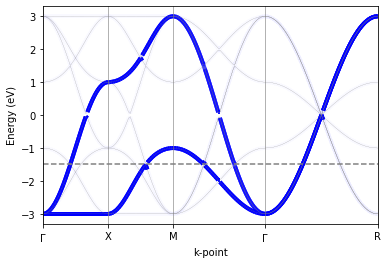

In [4]:
%matplotlib inline
build_perovskite_supercell_and_unfold(orbs='eg')

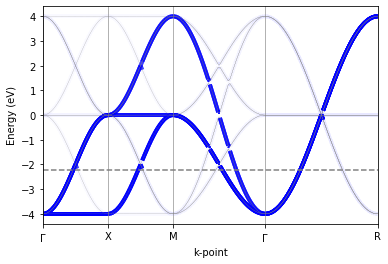

In [5]:
%matplotlib inline
build_perovskite_supercell_and_unfold(orbs='t2g')